<a href="https://colab.research.google.com/github/SithuniNudara/Multiple_Regression/blob/Master/Weather_Analysis_MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from matplotlib import pyplot as plt

In [54]:
dat = pd.read_csv("/content/SriLanka_Weather_Dataset_Colombo_2018_to_2023.csv")
dat.head()

,temperature_2m_mean,apparent_temperature_mean,windspeed_10m_max,et0_fao_evapotranspiration,rain_sum
0,26.5,30.7,10.0,4.43,0.1
1,27.0,31.1,9.2,4.40,0.4
2,27.3,30.9,11.0,4.38,0.0
3,27.2,29.3,11.4,5.20,0.0
4,25.8,26.5,17.0,5.83,0.0


In [55]:
dat.shape

(1994, 5)

# Rescale Data

In [56]:
for x in dat.columns:
  dat[x] = StandardScaler().fit_transform(dat[[x]])
dat.head()


,temperature_2m_mean,apparent_temperature_mean,windspeed_10m_max,et0_fao_evapotranspiration,rain_sum
0,-0.369198,-0.624407,-0.942985,0.755062,-0.717313
1,0.155671,-0.342972,-1.125868,0.721831,-0.685708
2,0.470592,-0.483689,-0.714381,0.699676,-0.727848
3,0.365618,-1.609428,-0.622939,1.608002,-0.727848
4,-1.104015,-3.579470,0.657241,2.305862,-0.727848


In [57]:
q1 = dat.quantile(0.25)
q3 = dat.quantile(0.75)
iqr = q3 - q1
lb = q1 - (1.5*iqr)
ub = q3 + (1.5*iqr)
cleandata = dat[~((dat>ub) | (dat<lb)).any(axis=1)]
print(dat[(dat>ub) | (dat<lb)].count())
cleandata.shape

temperature_2m_mean            47
apparent_temperature_mean      52
windspeed_10m_max              10
et0_fao_evapotranspiration     17
rain_sum                      128
dtype: int64


(1767, 5)

**Visualize The Data**

Index(['temperature_2m_mean', 'apparent_temperature_mean', 'windspeed_10m_max',
       'et0_fao_evapotranspiration', 'rain_sum'],
      dtype='object')


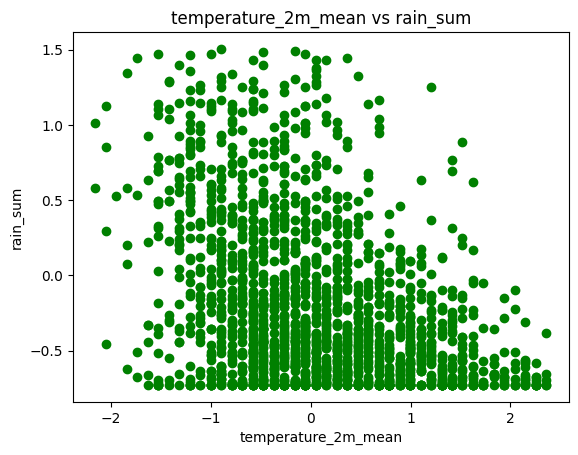

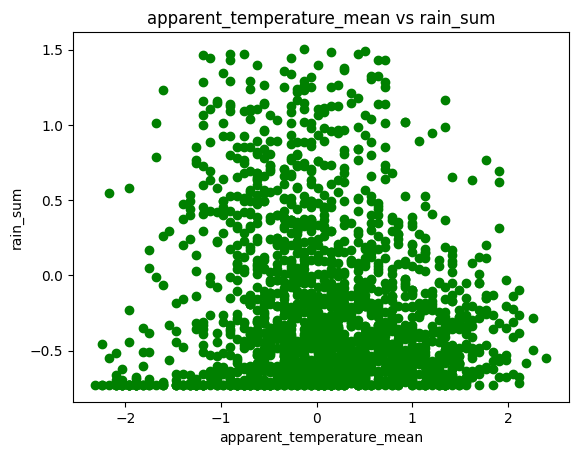

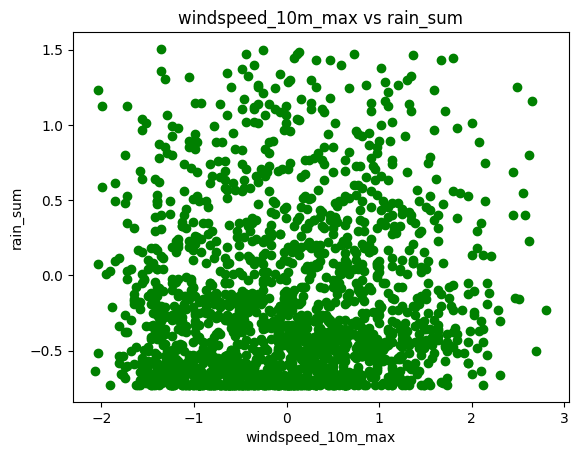

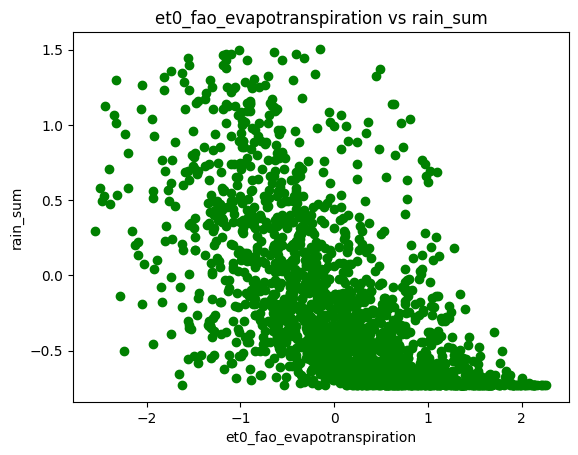

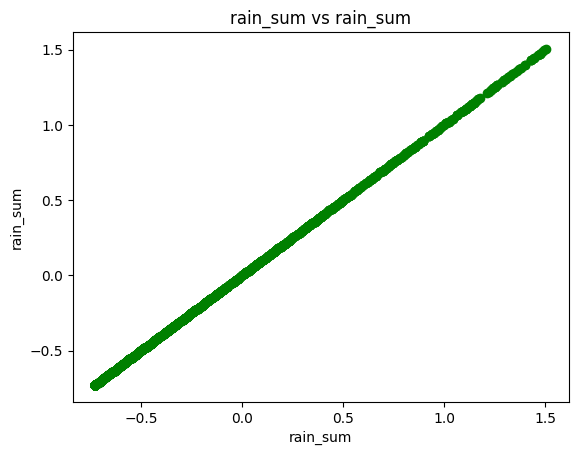

In [58]:
columns = cleandata.columns
print(columns)

for col in columns:
  plt.figure()
  plt.scatter(cleandata[col],cleandata['rain_sum'], color="green")
  plt.title(f'{col} vs rain_sum')
  plt.xlabel(col)
  plt.ylabel('rain_sum')
  plt.savefig(f'{col}.jpg')
  plt.show()

# Independent Features and Dependent Features

Data Splitting with ILoc Method

In [59]:
x = cleandata.iloc[:,0:4]
y = cleandata.iloc[:,4]


# Data Split for Train and Test

In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.8, random_state=42)
#

In [61]:
xtrain.shape

(1413, 4)

# Train 3 Different Models

In [62]:
modellinear = LinearRegression()
modellasso = Lasso(alpha=0.0000001)
modelridge = Ridge(alpha=10.0)

In [63]:
modellinear.fit(xtrain,ytrain)
modellasso.fit(xtrain,ytrain)
modelridge.fit(xtrain,ytrain)

Ridge(alpha=10.0)

In [64]:
ypredlinear = modellinear.predict(xtest)
ypredlasso = modellasso.predict(xtest)
ypredridge = modelridge.predict(xtest)

In [65]:
print(f'Linear RMSE {root_mean_squared_error(ytest,ypredlinear)}')
print(f'Linear R2 Score {r2_score(ytest,ypredlinear)}')

Linear RMSE 0.41021594341167894
Linear R2 Score 0.36808226437794833


36% OK

In [66]:
print(f'Lasso RMSE {root_mean_squared_error(ytest,ypredlasso)}')
print(f'Lasso R2 Score {r2_score(ytest,ypredlasso)}')

Lasso RMSE 0.4102159384187823
Lasso R2 Score 0.3680822797605777


Lasso improved when angle it

In [67]:
print(f'Ridge RMSE {root_mean_squared_error(ytest,ypredridge)}')
print(f'Ridge R2 Score {r2_score(ytest,ypredridge)}')

Ridge RMSE 0.4100398876791655
Ridge R2 Score 0.36862455859149756


36% Ok

Index(['temperature_2m_mean', 'apparent_temperature_mean', 'windspeed_10m_max',
       'et0_fao_evapotranspiration'],
      dtype='object')


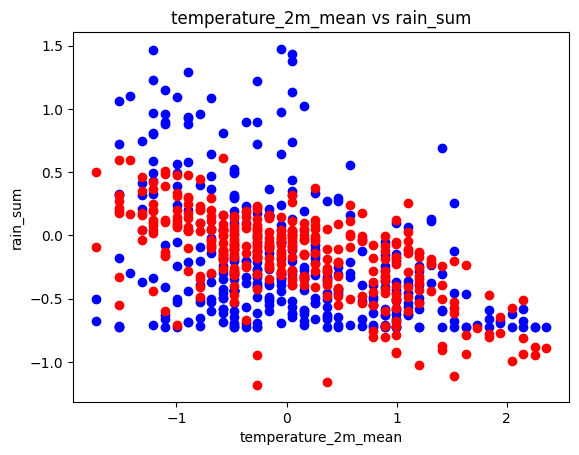

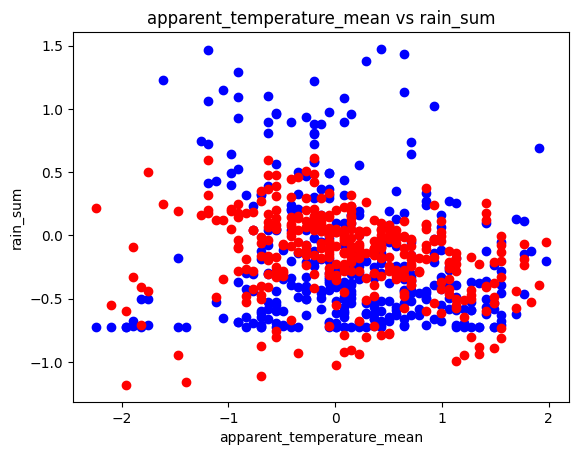

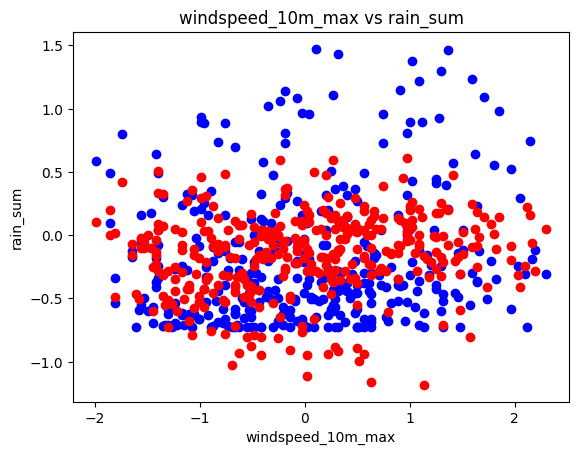

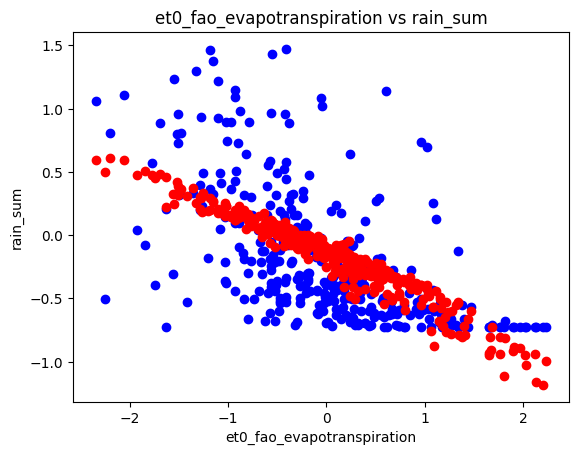

In [68]:
columns = xtest.columns
print(columns)

for col in columns:
  plt.figure()
  plt.scatter(xtest[col],ytest, color="blue")
  plt.scatter(xtest[col],ypredridge, color="red")
  plt.title(f'{col} vs rain_sum')
  plt.xlabel(col)
  plt.ylabel('rain_sum')
  # plt.savefig(f'{col}.jpg')
  plt.show()